## Step 1 : Reading and Understanding the Data

In [223]:
#importing the warnings to ignore the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

#import the necessary python libraries for building the LR model.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



In [224]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [225]:
df.shape

(730, 16)

In [226]:
df.info()  ## To check if there are null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [227]:
## We can also confirm Null data by
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [228]:
### Describe to check the stats of the data set
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [229]:
## We will drop date and instant column as they are usefull for our analysis

df.drop(['instant','dteday'],axis=1,inplace=True)

In [230]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [231]:
df.shape  #### Now we have 14 columns

(730, 14)

In [232]:
### Based on our intial analysis we have seen that casual users and registeres users are added in cnt column so we can drop this two column
df.drop(['casual','registered'],axis=1,inplace=True)




In [233]:
df.shape

(730, 12)

In [234]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [235]:
## Since there two fields representing temprature we drop one

df.drop(['atemp'],axis=1,inplace=True)

In [236]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [237]:
## Now that we have dropped all the unnecessary fields in the data set
# Lets now prepare the data set by replacing the continuous variable with catogorical content for visualizing the data

df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['yr'].replace({0:"2018",1:"2019"},inplace=True)
df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                    7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)
df['weathersit'].replace({1:"Clear",2:"Mist cloudy",3:"Light snow",4:'Heavy Rain'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


df.head()





,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


## Step 2 Visualising the Data and Exploratory Data Analysis

### First we will try to analyse the continuous variables

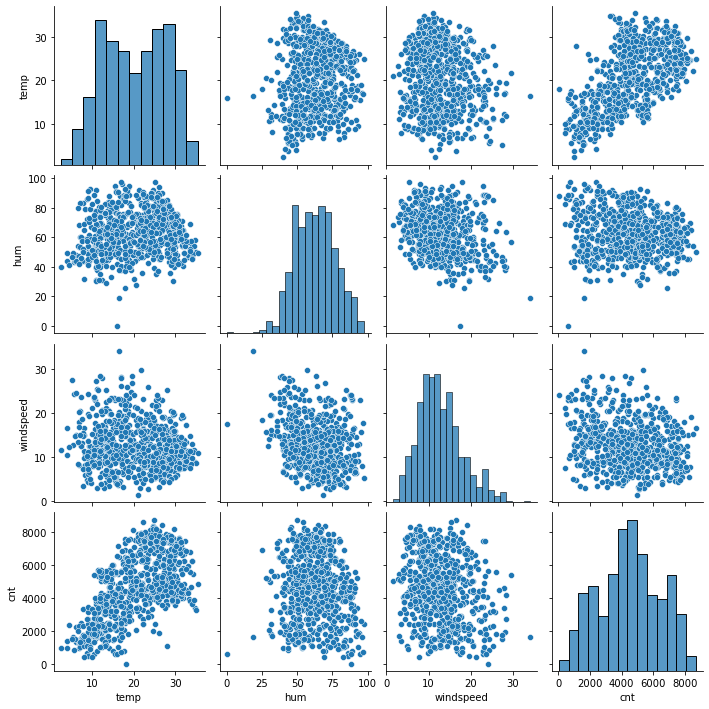

In [238]:

sns.pairplot(df, vars=['temp','hum','windspeed',"cnt"])
plt.show()

## From the below graph we see that there is some positive corelation and linearity between temprature and our target variable cnt

In [239]:
#now Check the correlation between continuous varibale and target varibale
corr_BS= df[['temp','hum','windspeed','cnt']].corr()
corr_BS.corr()

,temp,hum,windspeed,cnt
temp,1.000000,-0.089721,-0.679252,0.837192
hum,-0.089721,1.000000,-0.553687,-0.315066
windspeed,-0.679252,-0.553687,1.000000,-0.615012
cnt,0.837192,-0.315066,-0.615012,1.000000


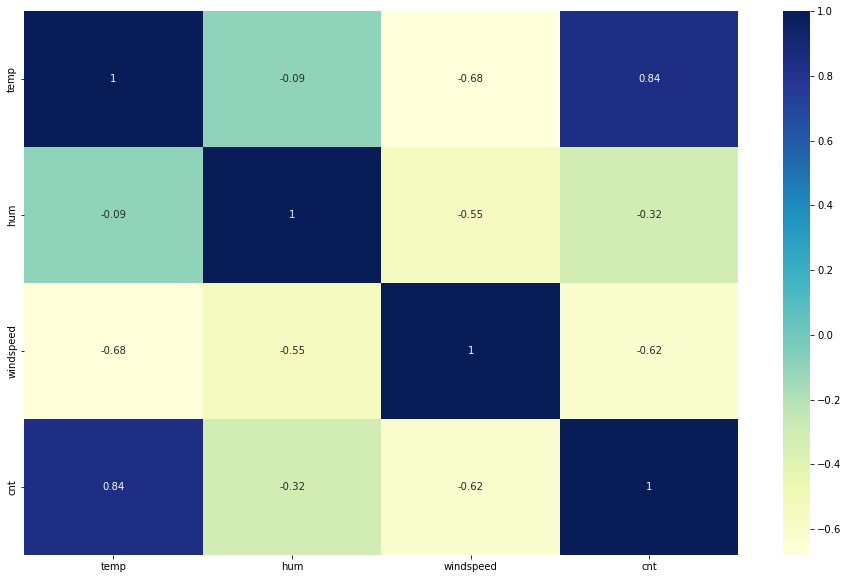

In [240]:

plt.figure(figsize = (16, 10))
sns.heatmap(corr_BS.corr(), annot = True, cmap="YlGnBu")
plt.show()

## From the below Heatmap
## By looking at the pair plot and heatmap temp variable has the highest (0.84) correlation with target variable 'cnt'

### Analysis of Categorical Variables 

In [241]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [242]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [243]:
df.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [244]:
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [245]:
df.weekday.value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [246]:
df.weathersit.value_counts()
### There is no heavy rain prediction  at all

Clear          463
Mist cloudy    246
Light snow      21
Name: weathersit, dtype: int64

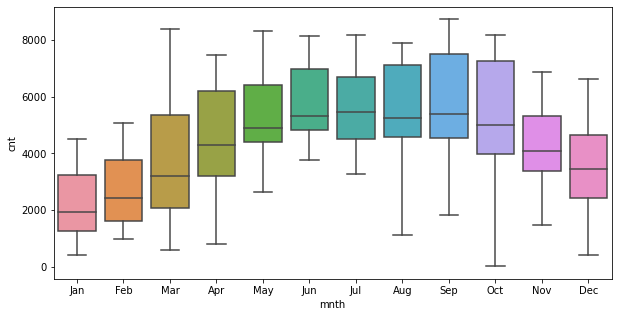

In [247]:
## Lets try out some box plot analysis
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()
## Looks like march april and sep and Oct are favourable time for Bike sharing

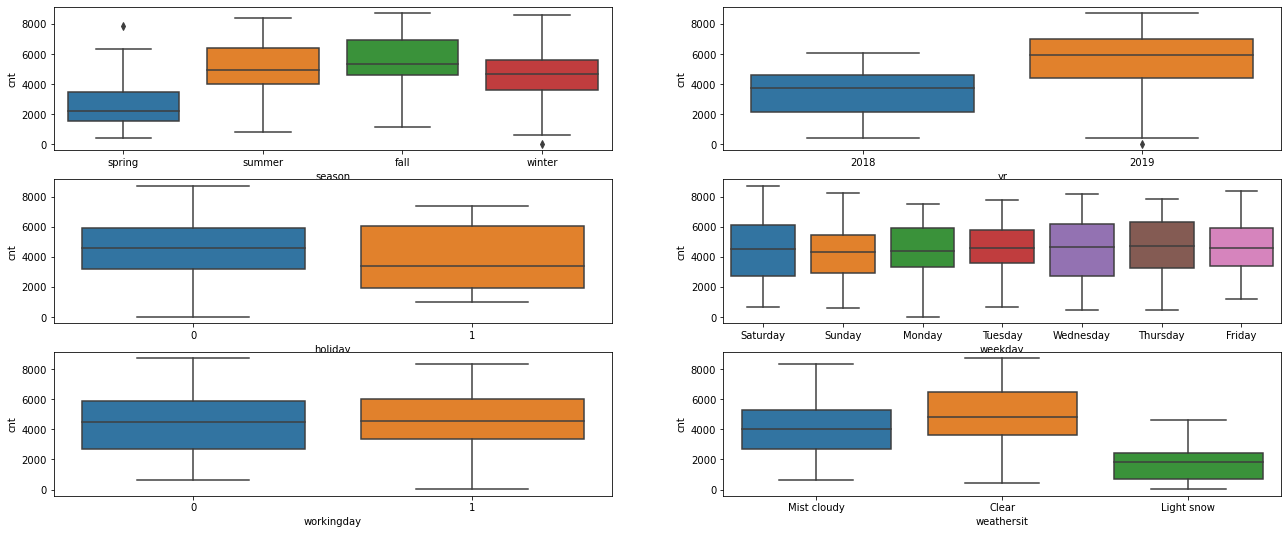

In [248]:
plt.figure(figsize=(22, 9))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

From the above Box Plot we can  tell that

* more bikes rented during fall season
* year 2019 indicates that more bikes rented
* working day & holiday box indicate that more bikes rented during normal working days than on weekends or holidays.
* weathersit box plots indicates that more bikes are rent during Clear Sky days

## Step 3: Data Preparation by Creating Dummy Variables for categorical variables

### In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [249]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [250]:
df=pd.get_dummies(data=df, columns=['season', 'yr','mnth','weekday','weathersit'], drop_first = True)
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [251]:
df.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [252]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape, df_test.shape)

(510, 29) (219, 29)


In [253]:
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [254]:
#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler_variables=['temp','hum','windspeed','cnt']

df_train[scaler_variables] = scaler.fit_transform(df_train[scaler_variables])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist cloudy
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [255]:
df_train.shape

(510, 29)

In [256]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Building a linear model

### Dividing into X and Y sets for the model building

In [257]:
y_train = df_train.pop('cnt')
X_train = df_train

In [258]:
print(X_train.shape, y_train.shape)

(510, 28) (510,)


In [259]:
import statsmodels.api as sm
## We need to add constant, other wise the regression line starts fron origin in stats model

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          8.74e-182
Time:                        22:21:26   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2451      0.035      6.955      0.000       0.176       0.314
holiday                    0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                 0.0969      0.012      7.905      0.000       0.073       0.121
temp                       0.4506      0.046      9.734      0.000       0.360       0.542
hum                       -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                 -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring             -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer              0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter              0.1058      0.028      3.794      0.000       0.051       0.161
yr_2019                    0.2321      0.008     28.820      0.000       0.216       0.248
mnth_Aug                   0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                  -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                  -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                  -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                  -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                  -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                   0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                   0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                  -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                   0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                   0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Monday            -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Saturday           0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sunday             0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thursday          -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tuesday           -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wednesday         -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_Light snow     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus)

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

In [260]:
## We see many variables have p value more than 0.05 so we will drop them as they are not significant

X_train_lm1 = X_train.drop(['holiday','season_spring','season_summer','mnth_Aug','mnth_Dec','mnth_Feb','mnth_Jan','mnth_Jul','mnth_Jun','mnth_Mar','mnth_May','mnth_Nov','mnth_Oct','weekday_Monday','weekday_Thursday','weekday_Tuesday','weekday_Wednesday'],axis=1)

X_train_lm1_c = sm.add_constant(X_train_lm1)

lr1 = sm.OLS(y_train, X_train_lm1_c).fit()

# Check the parameters
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.38e-176
Time:                        22:21:27   Log-Likelihood:                 473.71
No. Observations:                 510   AIC:                            -923.4
Df Residuals:                     498   BIC:                            -872.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1156      0.039      2.971      0.003       0.039       0.192
workingday                 0.1118      0.028      4.060      0.000       0.058       0.166
temp                       0.5858      0.021     27.474      0.000       0.544       0.628
hum                       -0.1438      0.040     -3.581      0.000      -0.223      -0.065
windspeed                 -0.1625      0.027     -5.952      0.000      -0.216      -0.109
season_winter              0.1137      0.011     10.747      0.000       0.093       0.135
yr_2019                    0.2293      0.009     26.395      0.000       0.212       0.246
mnth_Sep                   0.0773      0.016      4.742      0.000       0.045       0.109
weekday_Saturday           0.1195      0.029      4.107      0.000       0.062       0.177
weekday_Sunday             0.0657      0.029      2.247      0.025       0.008       0.123
weathersit_Light snow     -0.2502      0.028     -8.865      0.000      -0.306      -0.195
weathersit_Mist cloudy    -0.0533      0.011     -4.733      0.000      -0.075      -0.031
==============================================================================
Omnibus:                       45.285   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.122
Skew:                          -0.525   Prob(JB):                     1.63e-20
Kurtosis:                       4.785   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [261]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.15
0,workingday,15.40
1,temp,8.27
3,windspeed,4.28
7,weekday_Saturday,4.19
8,weekday_Sunday,4.14
10,weathersit_Mist cloudy,2.19
5,yr_2019,2.05
4,season_winter,1.51
9,weathersit_Light snow,1.19


In [263]:
## Since we see high VRF for hum and working day we will drop and will update the model

X_train_lm2 = X_train_lm1.drop(['hum','workingday','weekday_Saturday'],axis=1)

X_train_lm2_c = sm.add_constant(X_train_lm2)

lr2 = sm.OLS(y_train, X_train_lm2_c).fit()

# Check the parameters
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.08e-173
Time:                        22:21:27   Log-Likelihood:                 458.35
No. Observations:                 510   AIC:                            -898.7
Df Residuals:                     501   BIC:                            -860.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1409      0.018      7.882      0.000       0.106       0.176
temp                       0.5720      0.021     27.040      0.000       0.530       0.614
windspeed                 -0.1365      0.027     -5.070      0.000      -0.189      -0.084
season_winter              0.1048      0.011      9.826      0.000       0.084       0.126
yr_2019                    0.2327      0.009     26.227      0.000       0.215       0.250
mnth_Sep                   0.0690      0.017      4.138      0.000       0.036       0.102
weekday_Sunday            -0.0468      0.013     -3.713      0.000      -0.072      -0.022
weathersit_Light snow     -0.2841      0.027    -10.646      0.000      -0.336      -0.232
weathersit_Mist cloudy    -0.0745      0.009     -7.898      0.000      -0.093      -0.056
==============================================================================
Omnibus:                       49.078   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.958
Skew:                          -0.568   Prob(JB):                     5.36e-22
Kurtosis:                       4.822   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As we can see our Prob (F-statistic): is vesry low which means our model fit highly significant

In [264]:
# Final VIF Checking

vif = pd.DataFrame()
X1 = X_train_lm2
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.47
1,windspeed,2.96
3,yr_2019,2.00
7,weathersit_Mist cloudy,1.46
2,season_winter,1.27
5,weekday_Sunday,1.16
4,mnth_Sep,1.15
6,weathersit_Light snow,1.08


In [265]:
# Check the parameters obtained

lr2.params

const                     0.140886
temp                      0.572018
windspeed                -0.136547
season_winter             0.104767
yr_2019                   0.232722
mnth_Sep                  0.069006
weekday_Sunday           -0.046832
weathersit_Light snow    -0.284064
weathersit_Mist cloudy   -0.074474
dtype: float64

### Equation of best fit Line

 y=0.140886 + (0.572018)temp  + (-0.136547)windspeed + (0.104767)season_winter + (0.232722)yr_2019 + (0.069006)mnth_Sep + (-0.046832)weekday_Sunday + (-0.284064)weathersit_Light snow + (-0.074474)weathersit_Mist cloudy

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [266]:
#Predict values
y_train_predict = lr2.predict(X_train_lm2_c)

In [267]:
#CALCULATING RESIDUALS
res=y_train - y_train_predict

Text(0.5, 0, 'Errors')

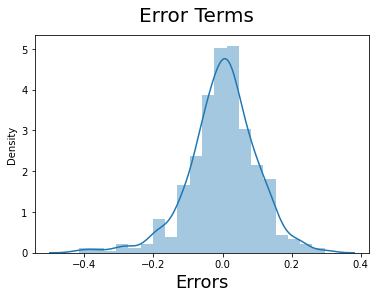

In [268]:
# Plot the histogram of the error terms to check the normality
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

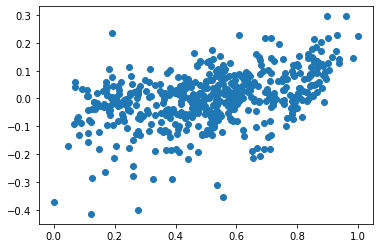

In [269]:
## To check the homoscadacity  , we see that there is no relationship with error terms and target variable
plt.scatter(y_train,res)

## Step 8: Making Predictions Using the Final Model

In [270]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Finding the R2
r2_score(y_train,y_train_predict)

0.8072658561978487

#### Trying to get same R2 value on Test data

In [271]:

df_test[scaler_variables] = scaler.fit_transform(df_test[scaler_variables])
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist cloudy
184,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.821739,0.070765,0.682387,0.569148,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [272]:
y_test=df_test.pop('cnt')

In [273]:
y_test.shape

(219,)

In [274]:
X_test=df_test
X_test.shape

(219, 28)

In [275]:
X_test = X_test.drop(['holiday','season_spring','season_summer','mnth_Aug','mnth_Dec','mnth_Feb','mnth_Jan','mnth_Jul','mnth_Jun','mnth_Mar','mnth_May','mnth_Nov','mnth_Oct','weekday_Monday','weekday_Thursday','weekday_Tuesday','weekday_Wednesday','hum','workingday','weekday_Saturday'],axis=1)


In [276]:
X_test.shape

(219, 8)

In [277]:
X_test_C = sm.add_constant(X_test)

In [278]:
X_test_C.head()

,const,temp,windspeed,season_winter,yr_2019,mnth_Sep,weekday_Sunday,weathersit_Light snow,weathersit_Mist cloudy
184,1.0,0.837241,0.149393,0,0,0,0,0,1
535,1.0,0.911423,0.231142,0,1,0,0,0,0
299,1.0,0.496221,0.443398,1,0,0,0,0,1
221,1.0,0.890387,0.449707,0,0,0,0,0,0
152,1.0,0.821739,0.682387,0,0,0,0,0,0


In [279]:
y_test_pred=lr2.predict(X_test_C)

In [280]:
## Finding R2
r2_score(y_test,y_test_pred)

0.7632907955013146

## Step 9: Model Evaluation

Text(0, 0.5, 'y_test_pred')

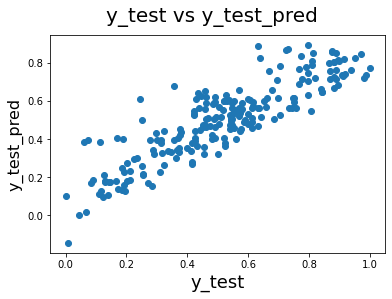

In [281]:
## Ploting a scatter graph for test and predict

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)    

#### We can see that the equation of our best fitted line is:
    
    
    y=0.140886 + (0.572018)temp  + (-0.136547)windspeed + (0.104767)season_winter + (0.232722)yr_2019 + (0.069006)mnth_Sep + (-0.046832)weekday_Sunday + (-0.284064)weathersit_Light snow + (-0.074474)weathersit_Mist cloudy

### Overall we have a decent model, but we also acknowledge that we could do better.